# Import Biblioteca

In [19]:
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carregando Dados

In [5]:
microdados = pd.read_csv('MICRODADOS_ENEM_2023.csv',encoding='latin1', sep=';')

# Transformando

## Filtrando a Base

In [6]:
microdados = microdados[(microdados['TP_PRESENCA_CN']==1) &
                (microdados['TP_PRESENCA_CH']==1) &
                (microdados['TP_PRESENCA_LC']==1) &
                (microdados['TP_PRESENCA_MT']==1)
                ]

## Deletando Colunas

In [7]:
microdados = microdados.drop(columns=[
    'TX_GABARITO_CN',
    'TX_GABARITO_CH',
    'TX_GABARITO_LC',
    'TX_GABARITO_MT',
    'TX_RESPOSTAS_CN',
    'TX_RESPOSTAS_CH',
    'TX_RESPOSTAS_LC',
    'TX_RESPOSTAS_MT',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5',
    'NU_NOTA_REDACAO',
    'TP_STATUS_REDACAO',
    'CO_PROVA_CN',
    'CO_PROVA_CH',
    'CO_PROVA_LC',
    'CO_PROVA_MT'
    ]
)

## Renomeando Colunas

In [8]:
microdados = microdados.rename(columns={
    'NU_INSCRICAO': 'Numero Inscricao',
    'NU_ANO': 'Ano Enem',
    'TP_FAIXA_ETARIA': 'Faixa Etaria',
    'TP_SEXO': 'Sexo',
    'TP_ESTADO_CIVIL': 'Estado Civil',
    'TP_COR_RACA': 'Raca',
    'TP_NACIONALIDADE': 'Nacionalidade',
    'TP_ST_CONCLUSAO': 'Situacao Conclusao EM',
    'TP_ANO_CONCLUIU': 'Ano Conclusao EM',
    'TP_ESCOLA': 'Escola',
    'TP_ENSINO': 'Tipo EM',
    'IN_TREINEIRO': 'Treineiro',
    'CO_MUNICIPIO_ESC': 'Codigo Municipio Escola',
    'NO_MUNICIPIO_ESC': 'Nome Municipio Escola',
    'CO_UF_ESC': 'Codigo Federacao Escola',
    'SG_UF_ESC': 'Sigla Federacao Escola',
    'TP_DEPENDENCIA_ADM_ESC': 'Dependencia ADM Escola',
    'TP_LOCALIZACAO_ESC': 'Localizacao Escola',
    'TP_SIT_FUNC_ESC': 'Situacao Funcionamento Escola',
    'CO_MUNICIPIO_PROVA': 'Codigo Municipio Prova',
    'NO_MUNICIPIO_PROVA': 'Nome Municipio Prova',
    'CO_UF_PROVA': 'Codigo Federacao Prova',
    'SG_UF_PROVA': 'Sigla Federacao Prova',
    'TP_PRESENCA_CN': 'Presenca Prova Ciências da Natureza',
    'TP_PRESENCA_CH': 'Presenca Prova Ciências Humanas',
    'TP_PRESENCA_LC': 'Presenca Prova Linguagens e Códigos',
    'TP_PRESENCA_MT': 'Presenca Prova Matemática',
    'NU_NOTA_CN': 'Nota Ciências da Natureza',
    'NU_NOTA_CH': 'Nota Ciências Humanas',
    'NU_NOTA_LC': 'Nota Linguagens e Códigos',
    'NU_NOTA_MT': 'Nota Matemática',
    'TP_LINGUA': 'Língua Estrangeira',
    'Q001': 'Até que série seu pai, ou o homem responsável por você, estudou?',
    'Q002': 'Até que série sua mãe, ou a mulher responsável por você, estudou?',
    'Q003': 'A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação do seu pai ou do homem responsável por você.',
    'Q004': 'A partir da apresentação de algumas ocupações divididas em grupos ordenados, indique o grupo que contempla a ocupação mais próxima da ocupação da sua mãe ou da mulher responsável por você.',
    'Q005': 'Incluindo você, quantas pessoas moram atualmente em sua residência?',
    'Q006': 'Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)',
    'Q007': 'Em sua residência trabalha empregado(a) doméstico(a)?',
    'Q008': 'Na sua residência tem banheiro?',
    'Q009': 'Na sua residência tem quartos para dormir?',
    'Q010': 'Na sua residência tem carro?',
    'Q011': 'Na sua residência tem motocicleta?',
    'Q012': 'Na sua residência tem geladeira?',
    'Q013': 'Na sua residência tem freezer (independente ou segunda porta da geladeira)?',
    'Q014': 'Na sua residência tem máquina de lavar roupa? (o tanquinho NÃO deve ser considerado)',
    'Q015': 'Na sua residência tem máquina de secar roupa (independente ou em conjunto com a máquina de lavar roupa)?',
    'Q016': 'Na sua residência tem forno micro-ondas?',
    'Q017': 'Na sua residência tem máquina de lavar louça?',
    'Q018': 'Na sua residência tem aspirador de pó?',
    'Q019': 'Na sua residência tem televisão em cores?',
    'Q020': 'Na sua residência tem aparelho de DVD?',
    'Q021': 'Na sua residência tem TV por assinatura?',
    'Q022': 'Na sua residência tem telefone celular?',
    'Q023': 'Na sua residência tem telefone fixo?',
    'Q024': 'Na sua residência tem computador?',
    'Q025': 'Na sua residência tem acesso à Internet?'
    }
)

## Transformando Tipo Coluna

In [9]:
microdados['Numero Inscricao'] = microdados['Numero Inscricao'].astype(str)
microdados['Faixa Etaria'] = microdados['Faixa Etaria'].astype(str)
microdados['Sexo'] = microdados['Sexo'].astype(str)
microdados['Estado Civil'] = microdados['Estado Civil'].astype(str)
microdados['Raca'] = microdados['Raca'].astype(str)
microdados['Nacionalidade'] = microdados['Nacionalidade'].astype(str)
microdados['Situacao Conclusao EM'] = microdados['Situacao Conclusao EM'].astype(str)
microdados['Ano Conclusao EM'] = microdados['Ano Conclusao EM'].astype(str)
microdados['Escola'] = microdados['Escola'].astype(str)
microdados['Tipo EM'] = microdados['Tipo EM'].apply(lambda x: str(int(x)) if pd.notna(x) else np.nan)
microdados['Codigo Municipio Escola'] = microdados['Codigo Municipio Escola'].apply(lambda x: str(int(x)) if pd.notna(x) else np.nan)
microdados['Codigo Federacao Escola'] = microdados['Codigo Federacao Escola'].apply(lambda x: str(int(x)) if pd.notna(x) else np.nan)
microdados['Treineiro'] = microdados['Treineiro'].astype(str)
microdados['Dependencia ADM Escola'] = microdados['Dependencia ADM Escola'].apply(lambda x: str(int(x)) if pd.notna(x)else np.nan)
microdados['Localizacao Escola'] = microdados['Localizacao Escola'].apply(lambda x: str(int(x)) if pd.notna(x) else np.nan)
microdados['Situacao Funcionamento Escola'] = microdados['Situacao Funcionamento Escola'].apply(lambda x: str(int(x)) if pd.notna(x) else np.nan)
microdados['Língua Estrangeira'] = microdados['Língua Estrangeira'].astype(str)

## Aplicando o Dicionario no arquivo

In [10]:
# Carregar Dicionario JSON
with open('dicionario.json', 'r', encoding= 'UTF-8') as f:
    substituicoes = json.load(f)

# Aplicar substituicao no DataFrame
def aplicar_substituicao(df,substituicoes):
    for coluna,mapa in substituicoes.items():
        if coluna in df.columns:
            df[coluna] = df[coluna].replace(mapa)
    return df

df = aplicar_substituicao(microdados, substituicoes)


## Fazendo Slice do DataFrame

In [11]:
# Define a nova fração (ex: 2.0%)
frac = 0.02

# Amostragem estratificada por Sexo e UF
amostra = df.groupby(["Sexo", "Sigla Federacao Prova"], group_keys=False).apply(
    lambda x: x.sample(frac=frac, random_state=42)
).reset_index(drop=True)

C:\Users\Leonardo Guimarães\AppData\Local\Temp\ipykernel_27728\2731860534.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  amostra = df.groupby(["Sexo", "Sigla Federacao Prova"], group_keys=False).apply(


# Indicadores

In [13]:
quantidade = len(amostra)

print(f'Nessa Base temos {quantidade} inscritos no ENEM 2023, iremos realizar algumas análises exploratórias')

Nessa Base temos 53564 inscritos no ENEM 2023, iremos realizar algumas análises exploratórias


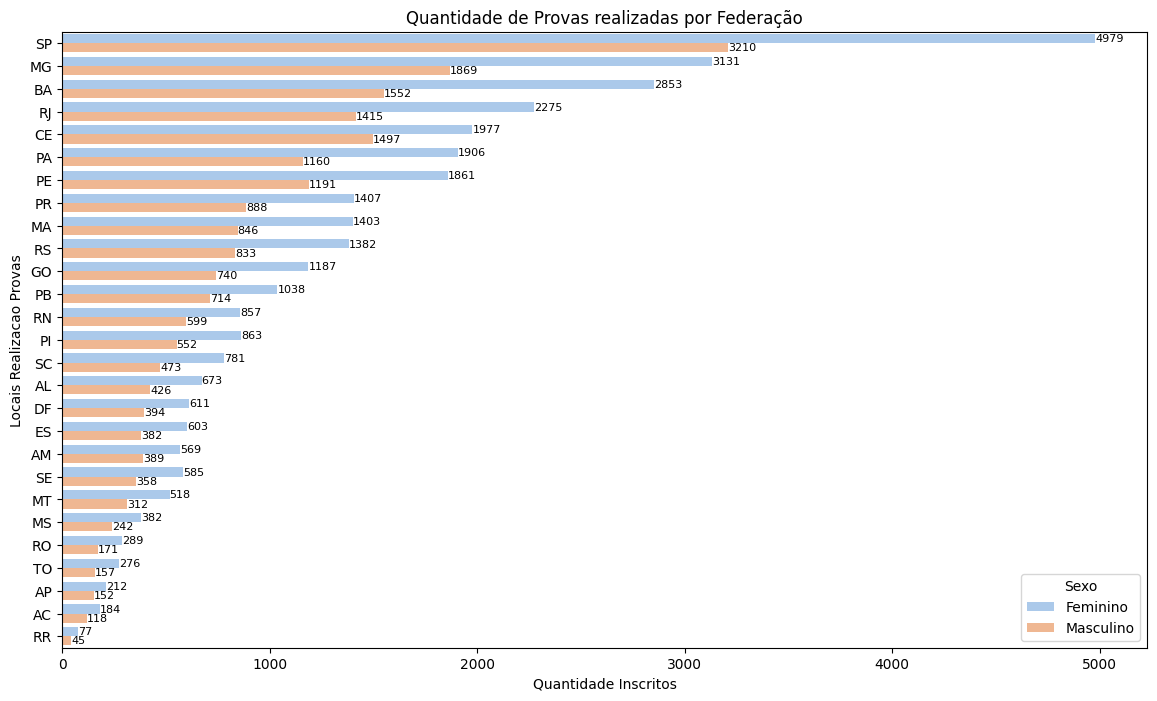

In [27]:
ordem = amostra['Sigla Federacao Prova'].value_counts().index.tolist()
plt.figure(figsize= (14,8))
contagem_estado = sns.countplot(amostra,y='Sigla Federacao Prova', palette='pastel', hue = 'Sexo', order = ordem)
contagem_estado.set_xlabel('Quantidade Inscritos')
contagem_estado.set_ylabel('Locais Realizacao Provas')
for container in contagem_estado.containers:
    contagem_estado.bar_label(container, fmt = '%d', fontsize = 8)
contagem_estado.set_title ('Quantidade de Provas realizadas por Federação')
plt.show()

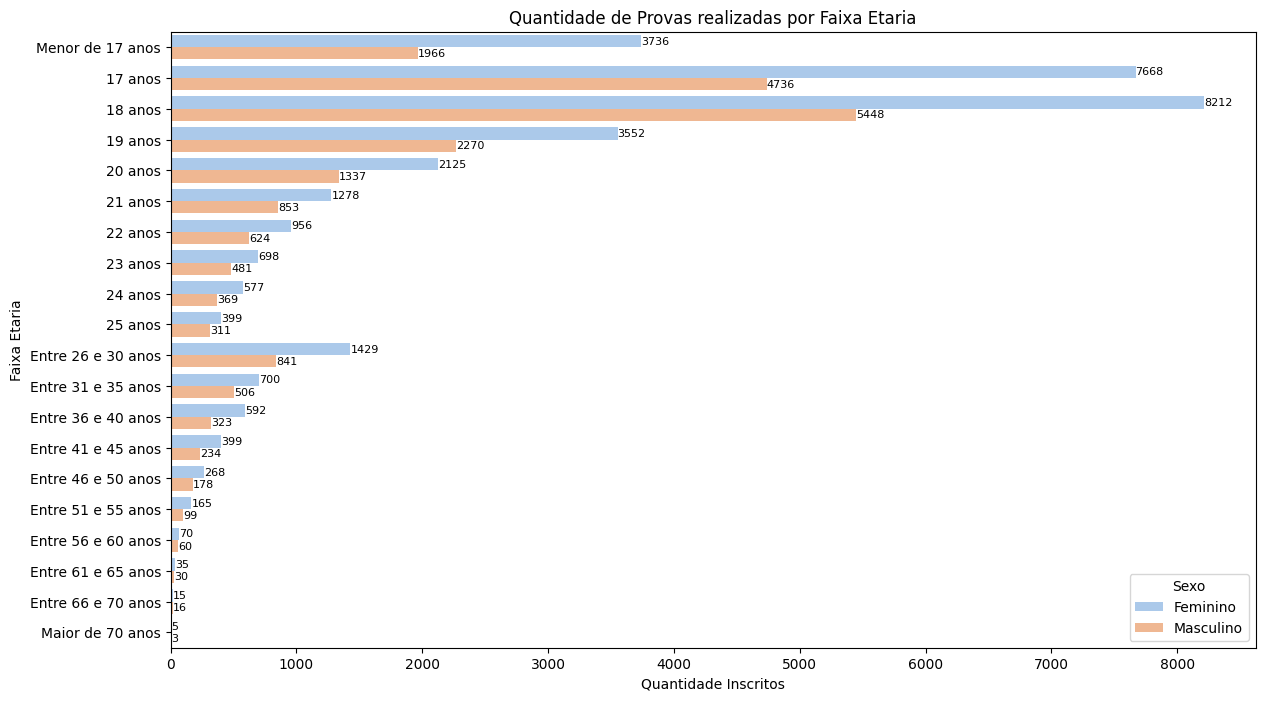

In [34]:
ordem_faixa_etaria = sorted(amostra['Faixa Etaria'].unique())
if 'Menor de 17 anos' in ordem_faixa_etaria:
    ordem_faixa_etaria.remove('Menor de 17 anos')
    ordem_faixa_etaria.insert(0,'Menor de 17 anos')
plt.figure(figsize= (14,8))
contagem_estado = sns.countplot(amostra,y='Faixa Etaria', palette='pastel', hue = 'Sexo', order = ordem_faixa_etaria)
contagem_estado.set_xlabel('Quantidade Inscritos')
contagem_estado.set_ylabel('Faixa Etaria')
for container in contagem_estado.containers:
    contagem_estado.bar_label(container, fmt = '%d', fontsize = 8)
contagem_estado.set_title ('Quantidade de Provas realizadas por Faixa Etaria')
plt.show()

podemos perceber que as Mulheres no ano de 2023 foi muito superior no quesito quantidade de provas realizadas, tanto na Faixa etaria que se destaca que elas são maiores em todas as faixas e tambem nao questão da região, que em todas as regiões a quantidade de mulheres presentes da prova do ENEM são muito maiores